# Red Wine Quality 

## Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
import warnings as wr
wr.filterwarnings("ignore")

## Loading the dataset:

In [2]:
# reading and loading the dataset
df = pd.read_csv('winequality-red.csv')
df.head()             #creating data frame

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# checking the data dimension
df.shape

(1599, 12)

There are 1599 rows and 12 columns including the target column

In [4]:
#to know missing values, data types
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values. Except target column all the columns has float datatype

In [5]:
#checking datatypes of all columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

It contains float and integer datatypes

In [6]:
#to know the features of the dataset
columns= df.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#statistical summary 
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# EDA

In [8]:
#checking the missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

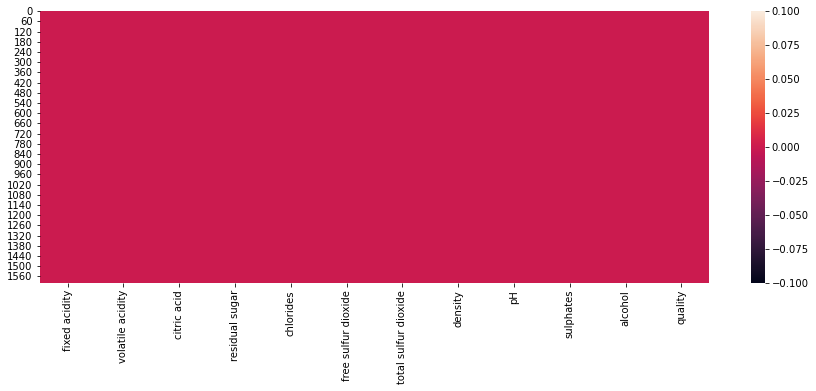

In [9]:
#Another way to check missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()               #visualizing missing values using heatmap

No null values in the above data

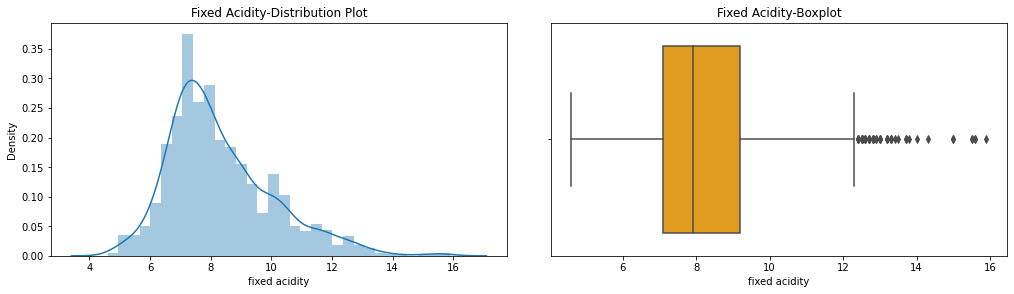

In [10]:
#visualizing fixed acidity feature by boxplot and distplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['fixed acidity'])
plt.title('Fixed Acidity-Distribution Plot')

plt.subplot(1,2,2)
sns.boxplot(df['fixed acidity'], color='orange')
plt.title('Fixed Acidity-Boxplot')

plt.tight_layout(pad=4)
plt.show()

We can see outliers and also the data is skewed for the 'fixed acidity'.

## Checking Outliers:

All Features-Boxplot


<function matplotlib.pyplot.show(close=None, block=None)>

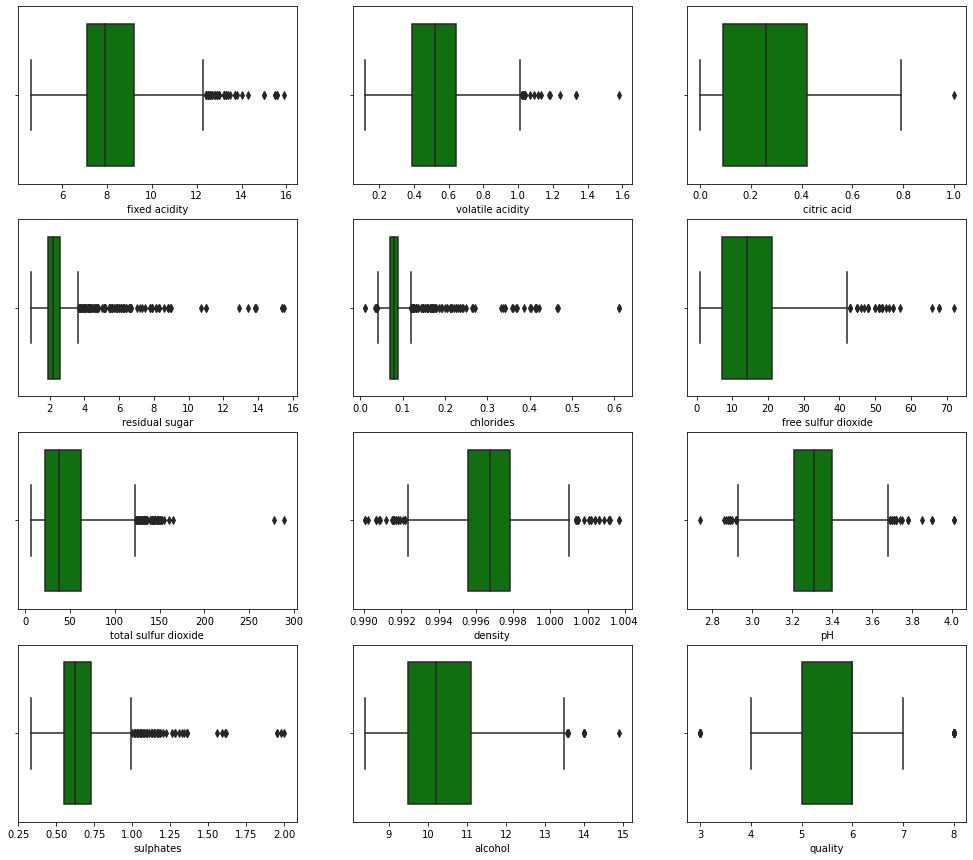

In [11]:
#checking outliers using boxplot
plt.figure(figsize=(17,15))
for i in range(0, len(columns)):
    plt.subplot(4,3, i+1)
    sns.boxplot(df[columns[i]], color='green')
print('All Features-Boxplot')
plt.show

All features have some outliers we need to remove them.

## Checking Skewness:

All Features- Distplot


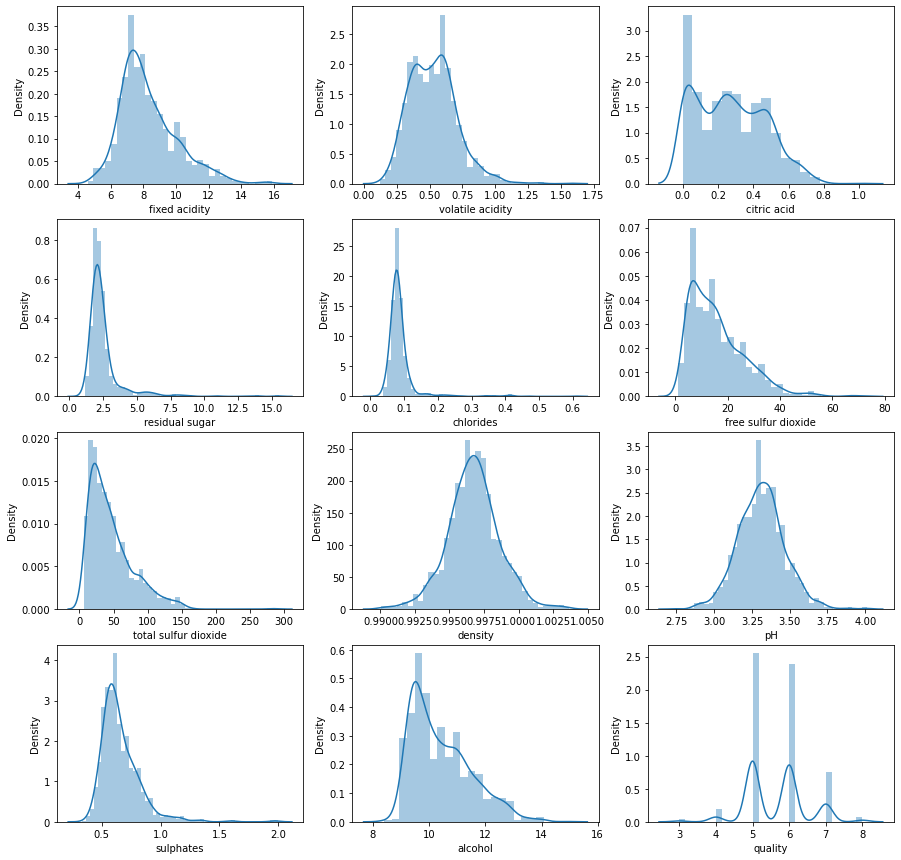

In [12]:
# checking skewness using distplot
plt.figure(figsize=(15,15))
for i in range(0, len(columns)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[columns[i]])
print('All Features- Distplot')
plt.show()

The features which are giving right skewed are 'residual sugars', 'chlorides', 'sulphates', 'total sulphur dioxide', 'free sulphur dioxide'. Other data have also some skewness it can be removed by removing the outliers but still the skewness is theere then it can be removed by boxcox.

## Pairplot:

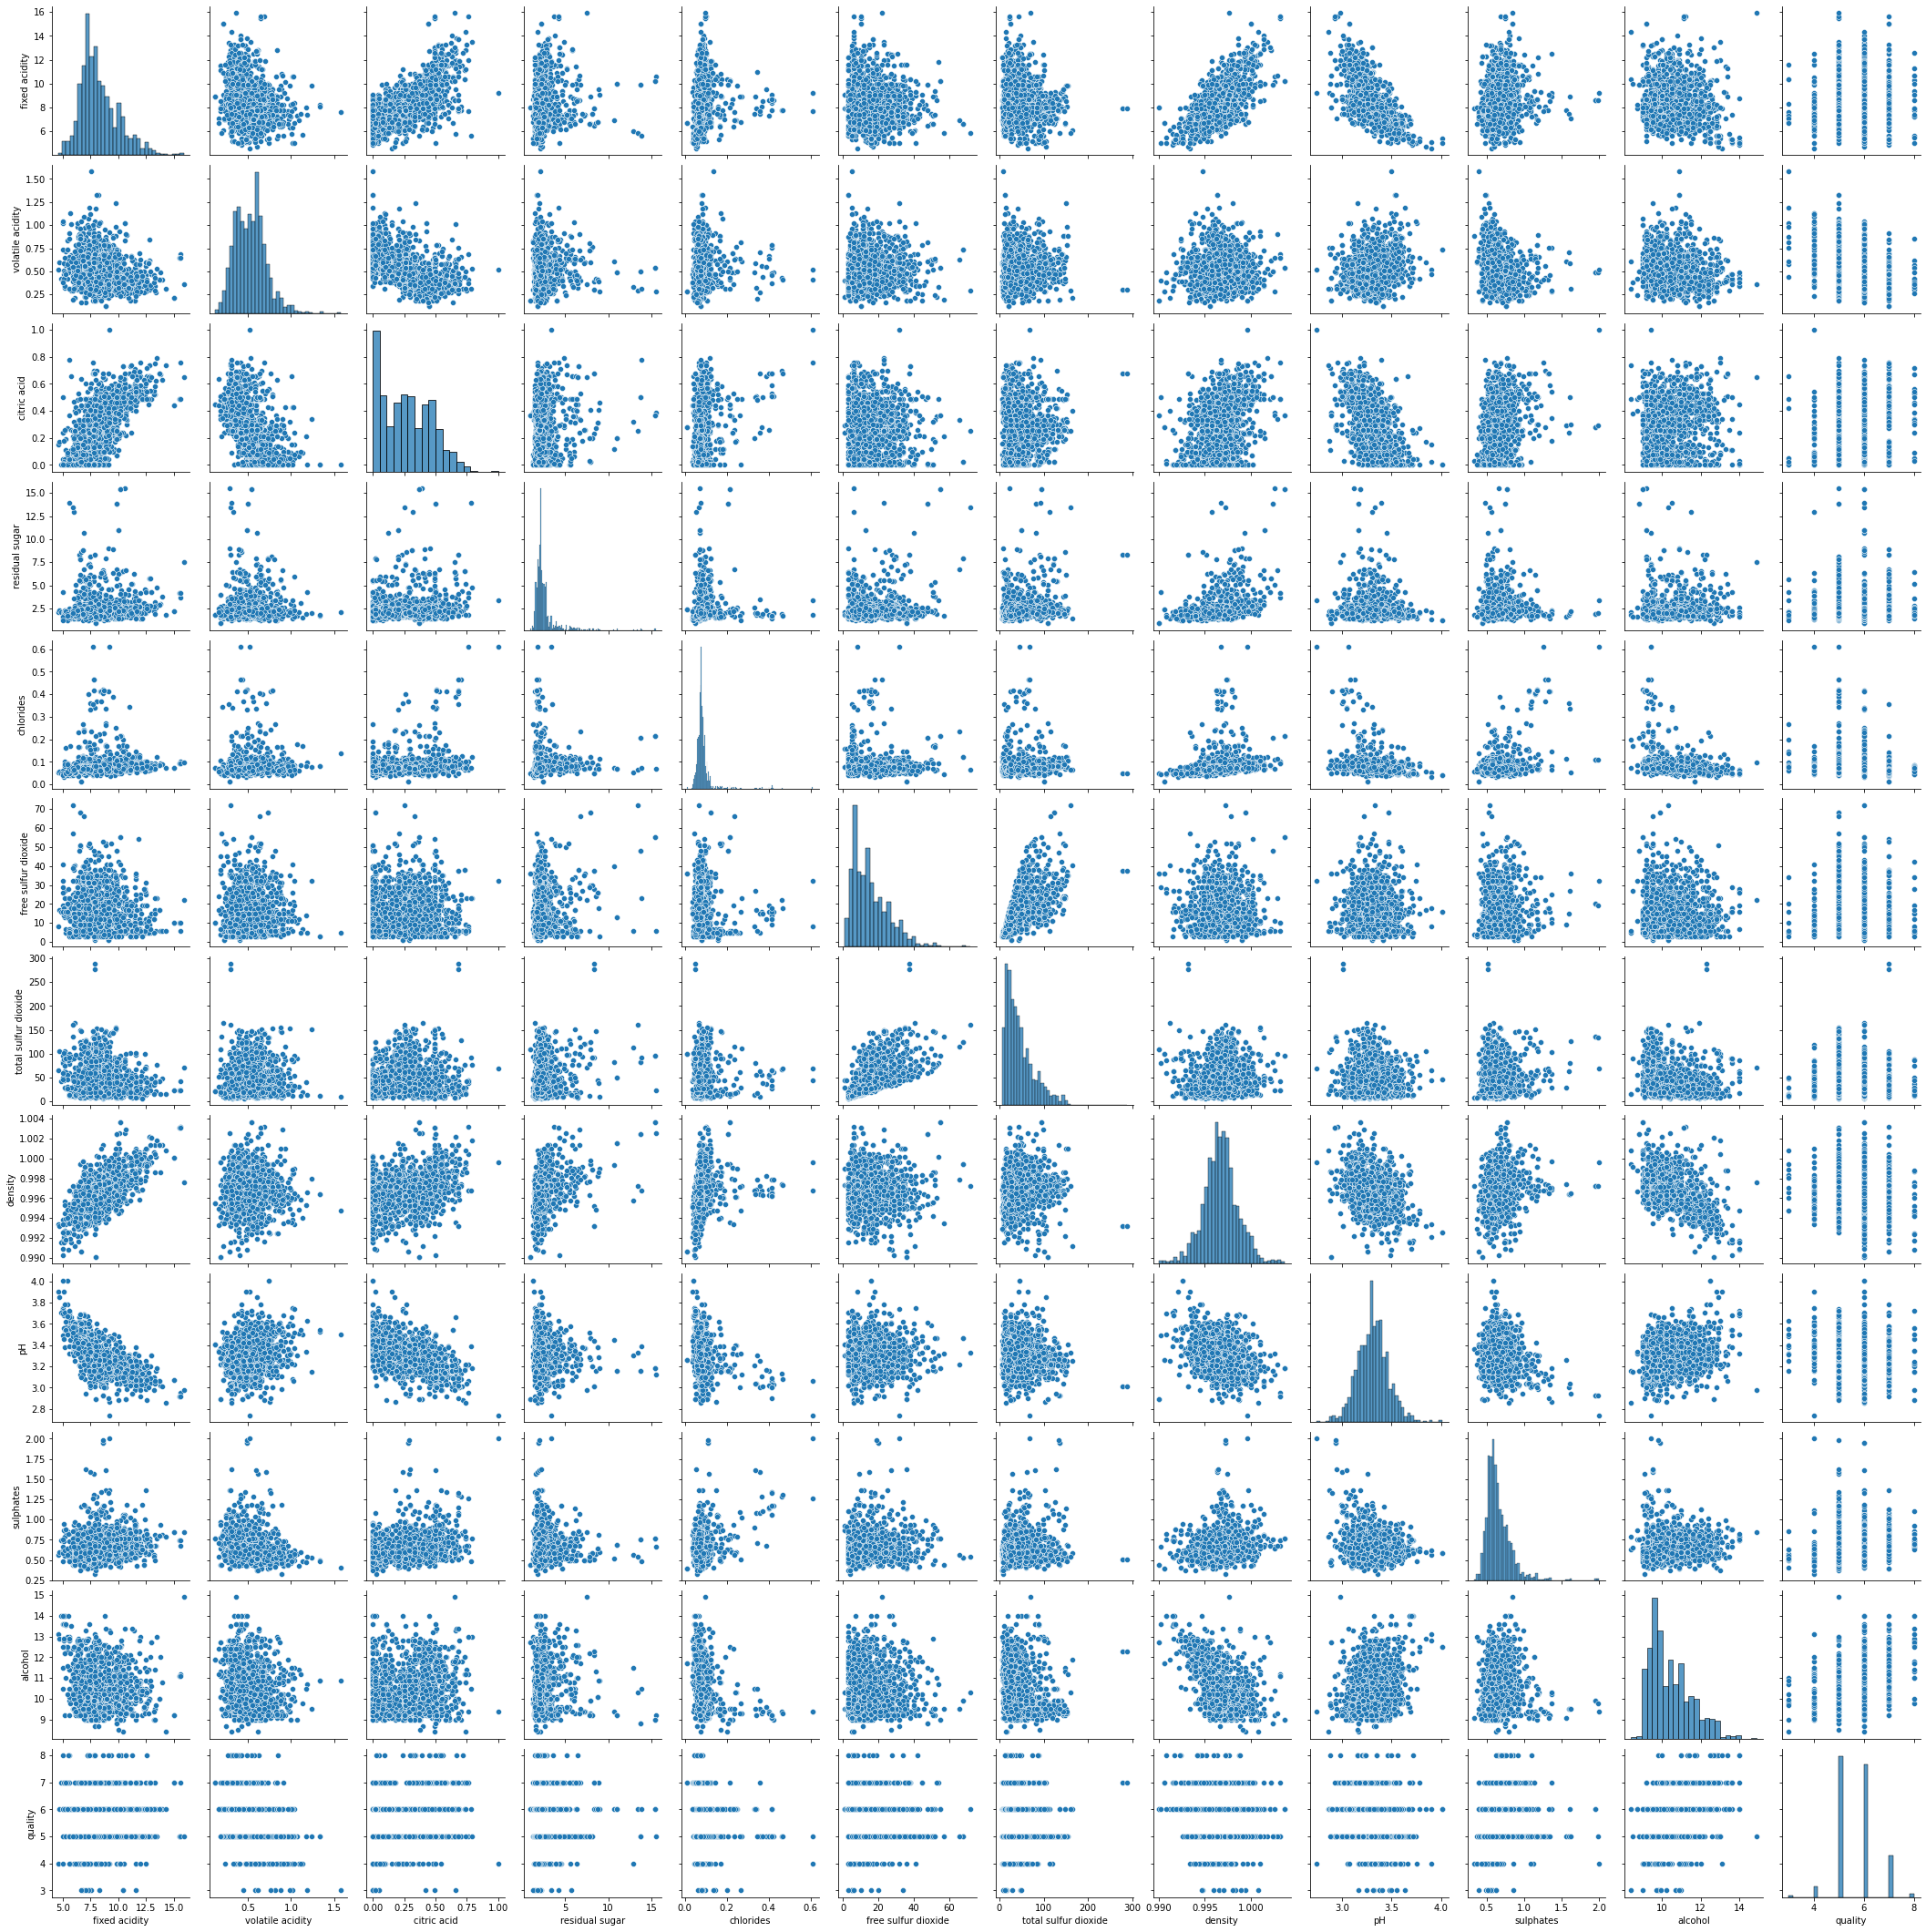

In [13]:
#visualizing data using pairplot
sns.pairplot(df)

## Removing Outliers:

In [14]:
#using zscore for removing outliers
z= np.abs(zscore(df))   #calculating absolute zscore
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1451, 12)

After removing outliers we get 1451 rows from the given dataset.

## Percentage data loss:

In [15]:
loss_percent=(1599-1451)/1599*100
print(loss_percent)

9.255784865540964


In [16]:
#checking old skew
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [17]:
#checking new skew
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

We can see that some skewness is removed but still we want to remove skewness for better learning of the model. So we will use log transformation to remove further skewness

## Removing Skewness:

In [18]:
#removing skewness using log transformation
col= ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
for i in range(0, len(col)):
    df_new[col[i]] = np.log(df_new[col[i]])
print('New dataset after log transformation')    
df_new.skew()

New dataset after log transformation


fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

Some more skewness in 'residual sugar'. We will remove that by using boxcox transformation.

In [19]:
#removing skewness of residual sugar using boxcox transformation
df_new['residual sugar'] = boxcox(df_new['residual sugar'])[0]
print(' New dataset after boxcox transformation')
df_new.skew()

 New dataset after boxcox transformation


fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          0.017700
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

New dataset is formed now after removing all skewness. We can check now using distplot.

## Distribution Plots:

All features-Distplot


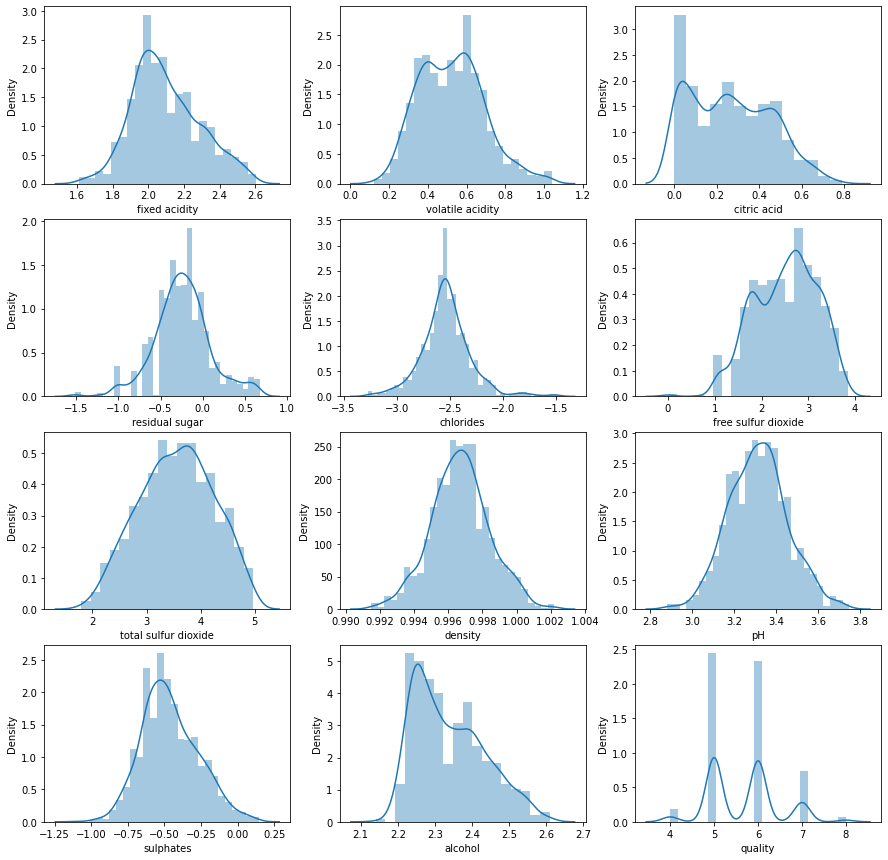

In [20]:
# visualizing all features by using distplot
plt.figure(figsize=(15,15))
for i in range(0, len(columns)):
    plt.subplot(4,3, i+1)
    sns.distplot(df_new[columns[i]])
print('All features-Distplot')
plt.show()

Features are normally distributed now and all the skewness is corrected.

## Correlation matrix:

In [21]:
#example of multivariate analysis
df_new.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296513     0.691118   
volatile acidity          -0.296513          1.000000    -0.589452   
citric acid                0.691118         -0.589452     1.000000   
residual sugar             0.215292          0.032915     0.190270   
chlorides                  0.228840          0.082052     0.100857   
free sulfur dioxide       -0.172552          0.052840    -0.110867   
total sulfur dioxide      -0.098986          0.106755    -0.030988   
density                    0.663494         -0.004957     0.371729   
pH                        -0.722263          0.251343    -0.520311   
sulphates                  0.190488         -0.353628     0.307876   
alcohol                   -0.035899         -0.213544     0.168325   
quality                    0.138709         -0.353443     0.243999   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.215292   0.228840            -0.172552   
volatile acidity            0.032915   0.082052             0.052840   
citric acid                 0.190270   0.100857            -0.110867   
residual sugar              1.000000   0.213008             0.039708   
chlorides                   0.213008   1.000000            -0.029109   
free sulfur dioxide         0.039708  -0.029109             1.000000   
total sulfur dioxide        0.130043   0.081987             0.778344   
density                     0.397441   0.392360            -0.038705   
pH                         -0.070662  -0.202450             0.134538   
sulphates                   0.069128  -0.001103             0.041883   
alcohol                     0.149910  -0.256679            -0.093753   
quality                     0.049191  -0.138821            -0.074309   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.098986  0.663494 -0.722263   0.190488   
volatile acidity                  0.106755 -0.004957  0.251343  -0.353628   
citric acid                      -0.030988  0.371729 -0.520311   0.307876   
residual sugar                    0.130043  0.397441 -0.070662   0.069128   
chlorides                         0.081987  0.392360 -0.202450  -0.001103   
free sulfur dioxide               0.778344 -0.038705  0.134538   0.041883   
total sulfur dioxide              1.000000  0.143405  0.035718   0.003842   
density                           0.143405  1.000000 -0.312310   0.135509   
pH                                0.035718 -0.312310  1.000000  -0.024869   
sulphates                         0.003842  0.135509 -0.024869   1.000000   
alcohol                          -0.270271 -0.463601  0.136486   0.255090   
quality                          -0.206877 -0.167568 -0.082164   0.402169   

                       alcohol   quality  
fixed acidity        -0.035899  0.138709  
volatile acidity     -0.213544 -0.353443  
citric acid           0.168325  0.243999  
residual sugar        0.149910  0.049191  
chlorides            -0.256679 -0.138821  
free sulfur dioxide  -0.093753 -0.074309  
total sulfur dioxide -0.270271 -0.206877  
density              -0.463601 -0.167568  
pH                    0.136486 -0.082164  
sulphates             0.255090  0.402169  
alcohol               1.000000  0.500866  
quality               0.500866  1.000000

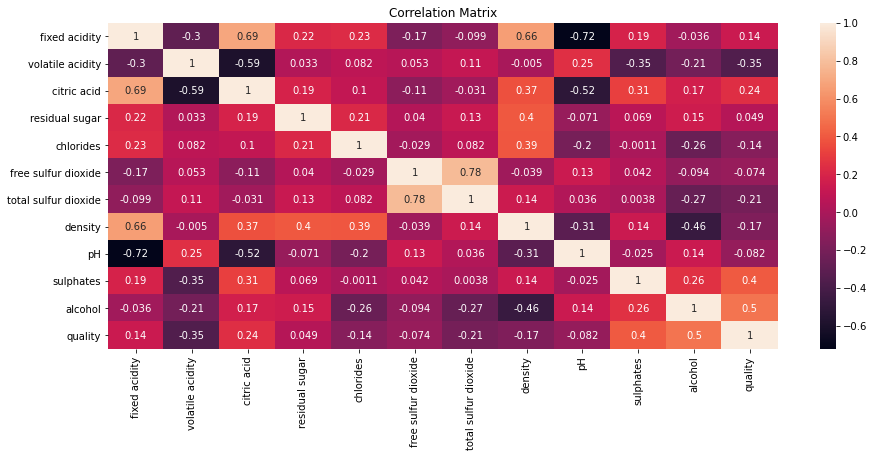

In [22]:
#visualizing correlation by heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_new.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

Quality of wine samples are related to 'alcohol' and 'sulphates'. 'Citric acid' and 'fixed acidity' have correlation with quality of wine. 'Total sulfur dioxide' and 'free sulfur dioxide' are correlated to each other. 'Citric acid' and 'density' are correlated with 'fixed acidity'.

## Scatter Plots:

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

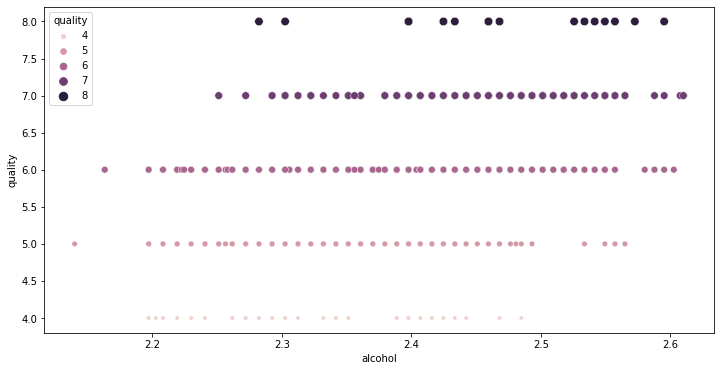

In [23]:
#Visualizing the relation between target and features using scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(x =df_new['alcohol'], y= df_new['quality'], hue = df_new['quality'],     #example of bivariate analysis
                size= df_new['quality'])

High quality wine has alcohol content 2.28 and low quality wine has alcohol content 2.19.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

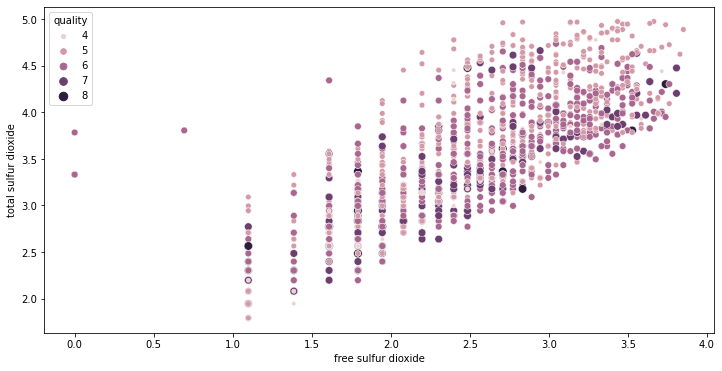

In [24]:
#visualizing relation between free sulfur dioxide and total sulfur dioxide
plt.figure(figsize=(12,6))                                           #example of bivariate analysis
sns.scatterplot(x = df_new['free sulfur dioxide'], y= df_new['total sulfur dioxide'], hue =df_new['quality'],
           size =df_new['quality'])

When free sulfur dioxide increases then total sulfur dioxide is also increases.

## Data imbalance:

<AxesSubplot:xlabel='quality', ylabel='count'>

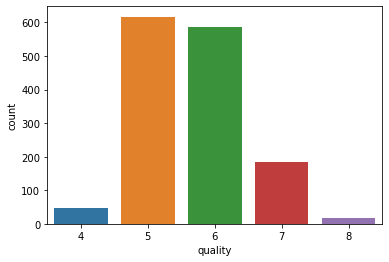

In [25]:
#visualizing the data imbalance by countplot
sns.countplot(x="quality", data= df_new)  #univariate analysis

Quality is defined in 6 unique values starting from 3 to 8. 3 is lowest and 8 is highest quality. 5 and 6 quality have large wine samples. 3 and 4 have have low quality and 7 and 8 have high quality.

The dataset is imbalanced and can cause overfitting.

## Dividing the dataset:

In [26]:
df["Quality"]=0
df.loc[df['quality']>6, 'Quality']=1
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Quality  
0      9.4        5        0  
1      9.8        5        0  
2      9.8        5        0  
3      9.8        6        0  
4      9.4        5        0

Dividing the wines into good and bad. Those which have the quality above 7 are considered as good wines and below it are bad once.

## Countplot:

In [27]:
##to check unique target variables & dropping the target class
df["Quality"].value_counts()
df.drop('quality', axis=1, inplace=True)

## Oversampling:

In [28]:
#splitting into attributes and target
x = df[df['Quality']==0]
y = df[df['Quality']==1]

#data balancing
upsampled = resample(y, replace=True, n_samples=x.shape[0])
df_new = pd.concat([x, upsampled])
df_new =shuffle(df_new)

The new data set has been splitted into x and y variables, x being the features and y being the target.

<AxesSubplot:xlabel='Quality', ylabel='count'>

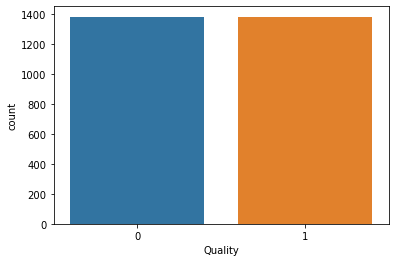

In [29]:
## To visualize the xlabel and ylabel by countplot
sns.countplot(df_new["Quality"])

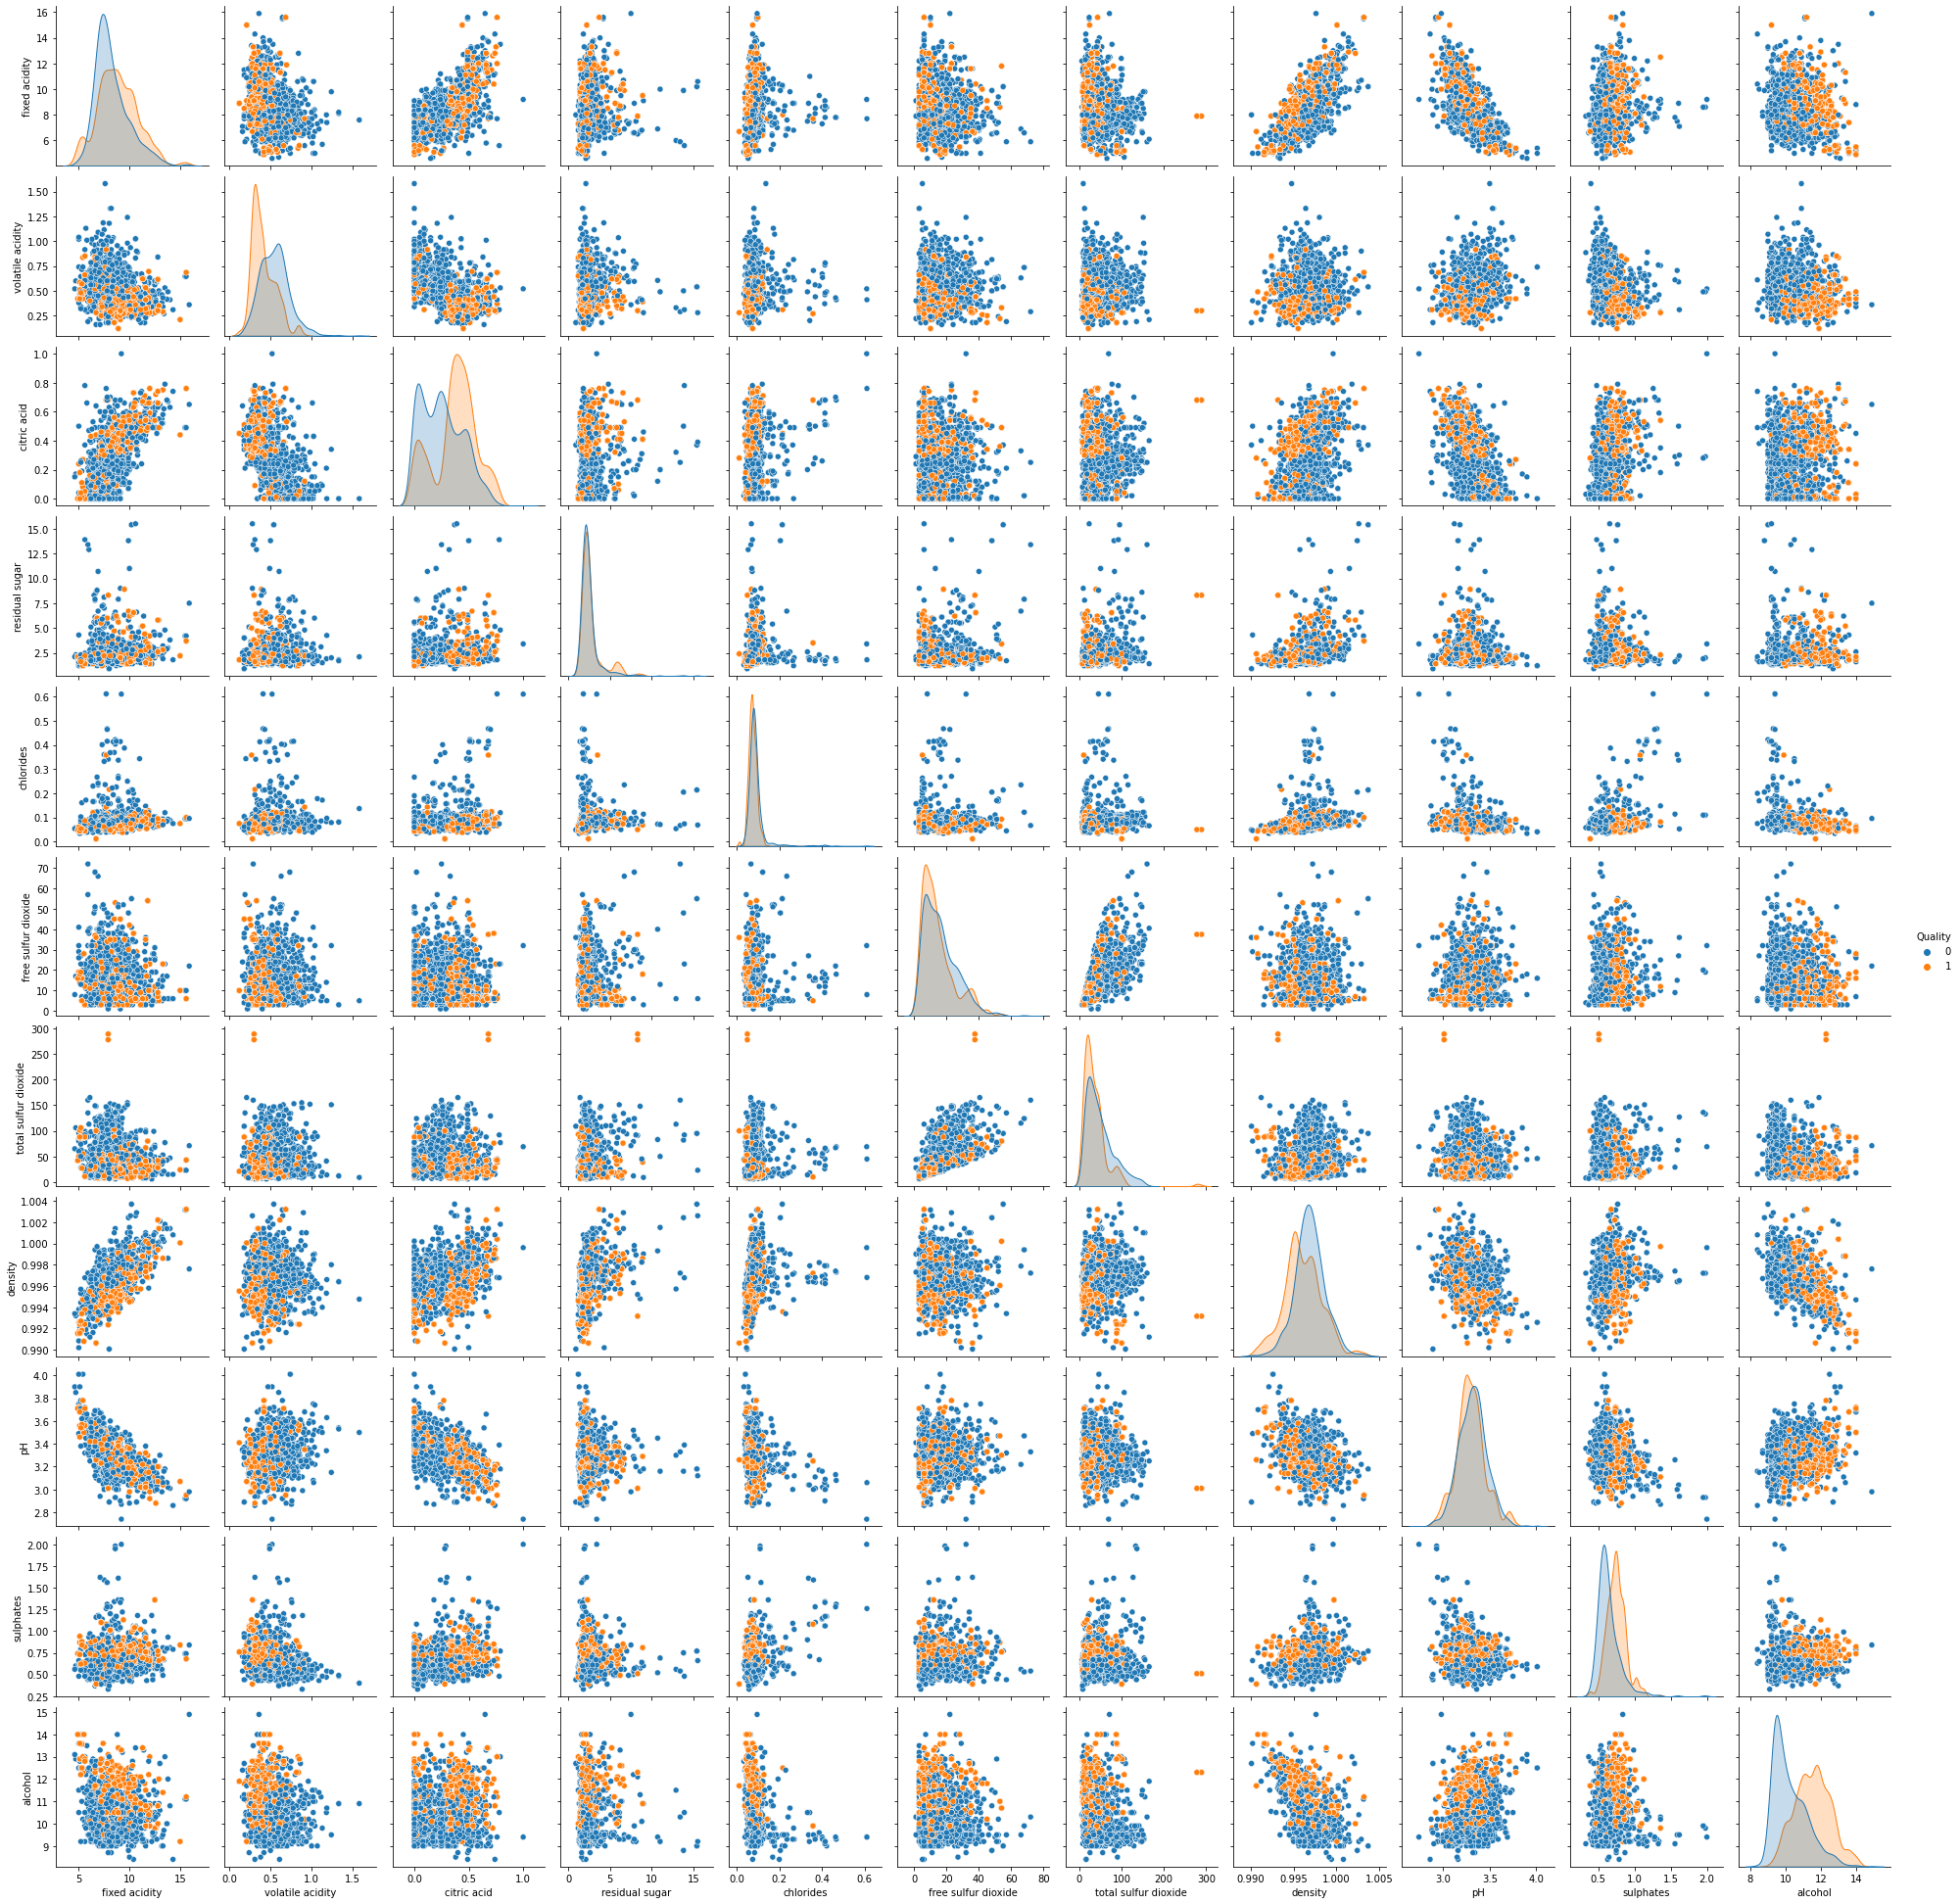

In [30]:
# Another visualization by pairplot
sns.pairplot(df_new, hue='Quality')

The data imbalanced has been removed. We can move forward for building the prediction model.

## Scaling:

In [31]:
# scaling by using train test split 
X = df_new.drop('Quality', axis=1)
y= df_new ['Quality']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [32]:
#StandardScaler
ss =StandardScaler()
X_train =ss.fit_transform(X_train.values)
X_test=ss.fit_transform(X_test.values)
X_train=pd.DataFrame(X_train, columns= X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.268745          1.986780    -1.306359       -0.153522  -0.013673   
1      -0.935409          1.928844    -1.306359       -0.440147  -0.312714   
2      -0.169129          1.465355    -0.506398       -0.655116  -0.203972   
3      -0.552269          0.770123    -0.256410       -0.511803  -0.231157   
4      -0.442801         -1.199704     1.843488        0.634698   7.516731   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             1.013004              1.625909  0.843710  0.359871  -1.036209   
1            -0.895198             -0.866339 -0.388719  1.334564  -0.220417   
2            -0.990608             -0.896732  0.188371 -0.679802  -1.098963   
3             0.822184              1.382763 -0.144190 -0.030006  -1.036209   
4            -0.990608             -0.987912  0.383995 -0.354904   2.415220   

    alcohol  
0 -0.774497  
1 -0.091223  
2 -1.201544  
3 -0.945316  
4 -0.859907

In [33]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.572059         -0.364685     1.731529        0.246218   0.011175   
1      -1.074859          2.305541    -1.548528       -0.721292  -0.694477   
2      -0.061826         -1.107944     1.152695       -0.572444   0.160859   
3      -1.530724          2.030260    -1.307348       -0.870140  -0.844161   
4       0.900555         -0.227045     1.972710        2.962688  -0.224042   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.216560              0.078704  2.232830 -1.492207   0.606412   
1            -0.591590             -0.767041 -0.892403  1.256346  -0.415617   
2             2.034896              2.030423  0.143150  0.007004   0.305815   
3            -0.288533              1.542493 -1.946531  1.631149   0.726650   
4             2.337952              1.152149  1.118334 -0.805069   0.907009   

    alcohol  
0 -0.696953  
1  0.048905  
2 -0.282588  
3  1.706365  
4  0.960508

All the datatypes are of float datatype. Min-Max Scaling has been done.

## Building the model

In [35]:
key = ['KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC']
value = [KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), SVC()]

models = dict(zip(key,value))

A classification problem. So we need to select the classification model from KNeighborsClassifier, LogisticRegression, RandomForestClassifier, GaussianNB, DecisionTreeClassifier, XGBClassifier and SVC. We need to fit the training and testing data one by one into the model and compare its accuracy.

### Model Selection:

In [36]:
training_scores=[]
testing_scores=[]

for key, value in models.items():
    value.fit(X_train, y_train)
    train_score=value.score(X_train, y_train)
    test_score=value.score(X_test, y_test)
    training_scores.append(train_score)
    training_scores.append(test_score)
    
    print(f'{key}\n')
    print(f"Training Score: {train_score}")
    print(f"Testing_score: {test_score}\n")

KNeighborsClassifier

Training Score: 0.9199457259158752
Testing_score: 0.8842676311030742

RandomForestClassifier

Training Score: 1.0
Testing_score: 0.9620253164556962

GaussianNB

Training Score: 0.7783808231569426
Testing_score: 0.7938517179023508

DecisionTreeClassifier

Training Score: 1.0
Testing_score: 0.8788426763110307

[23:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier

Training Score: 1.0
Testing_score: 0.9258589511754068

SVC

Training Score: 0.8701944821347807
Testing_score: 0.8481012658227848



From the above accuracy scores, we get find out that the accuracy score for the random forest classifier is highest. We need to cross validate the model to cheak the overfitting of the model. We cross validate the scoring criteria as f1-score. The model whose difference between accuracy and mean accuracy given by cross validation will be the least considered as the best model.

### Cross Validation

In [37]:
cv_scores =[]
for key, value in models.items():
    cvs=cross_val_score(value, X,y, cv=5)
    
    cv_scores.append(cvs.mean())
    print(f'{key}\n')
    print(f"CV Score: {cvs.mean()} \n")           

KNeighborsClassifier

CV Score: 0.8737400739051813 

RandomForestClassifier

CV Score: 0.9732244411248263 

GaussianNB

CV Score: 0.7793052388814635 

DecisionTreeClassifier

CV Score: 0.9591143171632991 

[23:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

Now tune the model with hyper parameter tuning. Later on we have to evaluate the model on the basis of auc score.

## Hyperparameter Tuning

### Tuning the Random Forest Classifier Model

In [38]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred=rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9602169981916817
[[277  14]
 [  8 254]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       291
           1       0.95      0.97      0.96       262

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553



In [39]:
params = {'n_estimators': [10,100,200],
'max_depth': [10,50,100,150],
    'min_weight_fraction_leaf':[0,0.1,0.01],
        'ccp_alpha':[0,0.01,0.1]}
grid=GridSearchCV(rfc, param_grid=params, cv =5, verbose=1)

In [40]:
grid.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'max_depth': [10, 50, 100, 150],
                         'min_weight_fraction_leaf': [0, 0.1, 0.01],
                         'n_estimators': [10, 100, 200]},
             verbose=1)

In [41]:
grid.best_params_

{'ccp_alpha': 0,
 'max_depth': 50,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

After hyperparameter tuning we have got the best parameters.

## Model Evaluation

Evaluation of model using accuracy, confusion matrix and classification report.

In [42]:
#evaluation of random forest classifier
best=grid.best_estimator_
best.fit(X_train, y_train)
pred=best.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9312839059674503
[[278  13]
 [ 25 237]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       291
           1       0.95      0.90      0.93       262

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



From the above evaluation we can see that random forest classifier has f1 score of 0.93 and the precision and recall are great than 0.90.
Now we can plot ROC curve and look at the AUC score for the model.

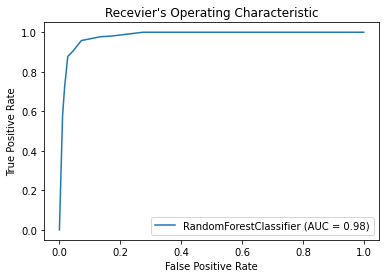

In [43]:
#AUC-ROC Curve
plot_roc_curve(best, X_test, y_test)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

From above ROC curve, we can visualize that the model has an AUC score of 0.98

## Serialization:

### Saving the model:

The fitted model can now be saved as an pickle outside the jupyter notebook and used for prediction.

In [44]:
joblib.dump(best, "Red_Wine_Quality_Prediction_model.pkl")  #saving model as a pickle

['Red_Wine_Quality_Prediction_model.pkl']

### Conclusion

In [45]:
a=np.array(y_test)
predicted=np.array(best.predict(X_test))
df_com=pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a))) #creating data frame 
df_com

Original  Predicted
0           0          0
1           0          0
2           1          1
3           1          1
4           1          1
5           0          0
6           0          1
7           1          1
8           1          1
9           0          0
10          0          0
11          0          0
12          0          0
13          1          1
14          0          0
15          0          0
16          0          0
17          0          0
18          1          1
19          0          0
20          1          1
21          0          0
22          1          1
23          0          0
24          1          1
25          0          0
26          1          1
27          1          1
28          0          0
29          0          0
30          0          0
31          1          1
32          0          0
33          0          1
34          1          1
35          1          1
36          0          0
37          0          0
38          1          1
39          1          1
40          0          0
41          1          1
42          0          0
43          0          0
44          1          1
45          0          0
46          1          1
47          0          0
48          1          1
49          0          0
50          1          1
51          0          0
52          0          0
53          0          0
54          1          1
55          0          0
56          0          0
57          1          1
58          0          0
59          1          1
60          0          0
61          1          1
62          1          1
63          1          1
64          1          1
65          1          0
66          0          0
67          1          1
68          0          0
69          1          1
70          1          1
71          1          1
72          0          0
73          1          0
74          1          1
75          0          0
76          1          1
77          0          0
78          1          0
79          0          0
80          0          0
81          0          0
82          1          1
83          1          1
84          0          0
85          1          1
86          0          0
87          0          0
88          0          0
89          0          0
90          0          0
91          1          1
92          0          0
93          0          0
94          1          1
95          0          0
96          1          1
97          1          0
98          1          0
99          1          1
100         1          1
101         1          1
102         0          0
103         0          0
104         0          0
105         0          0
106         0          0
107         1          1
108         0          0
109         0          0
110         1          0
111         1          1
112         1          1
113         1          1
114         0          0
115         1          1
116         0          0
117         0          0
118         0          0
119         1          1
120         1          1
121         0          0
122         1          1
123         1          1
124         1          1
125         0          0
126         1          0
127         1          1
128         1          1
129         0          0
130         1          1
131         1          1
132         0          0
133         0          0
134         1          1
135         1          1
136         1          1
137         0          0
138         0          0
139         0          1
140         0          0
141         0          0
142         1          0
143         1          1
144         0          0
145         1          0
146         1          1
147         0          0
148         1          1
149         1          1
150         1          1
151         0          0
152         1          1
153         0          0
154         1          1
155         0          0
156         0          0
157         0          0
158         1          1
159  

### Loading the saved data:

In [46]:
mod=joblib.load('Red_Wine_Quality_Prediction_model.pkl')

In [47]:
prediction= mod.predict(X_test)
prediction=pd.DataFrame(prediction)  #converting into dataframe
prediction.to_csv("Results.csv", index=False)